<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_08_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 구성 요소
---

## 핵심 키워드
---
- 합성곱
- 필터
- 특성 맵
- 패딩
- 스트라이트
- 풀링


## 합성곱 
---
- 밀집층 : 뉴런마다 입력 갯수만큼 가중치가 있음, 10개의 입력에 10개의 가중치를 계산 1개의 출력이 나옴
- 합성곱 : 뉴런에 입력 갯수의 일부의 가중치를 곱함
- 10개의 입력에 3개의 특성을 사용한다고 하면 3개의 가중치를 사용하는  8개의 출력이 생성됨
- 입력 데이터 위를 이동하면서 도장을 찍는 느낌, 도장 하나를 찍으면 출력이 하나 생성

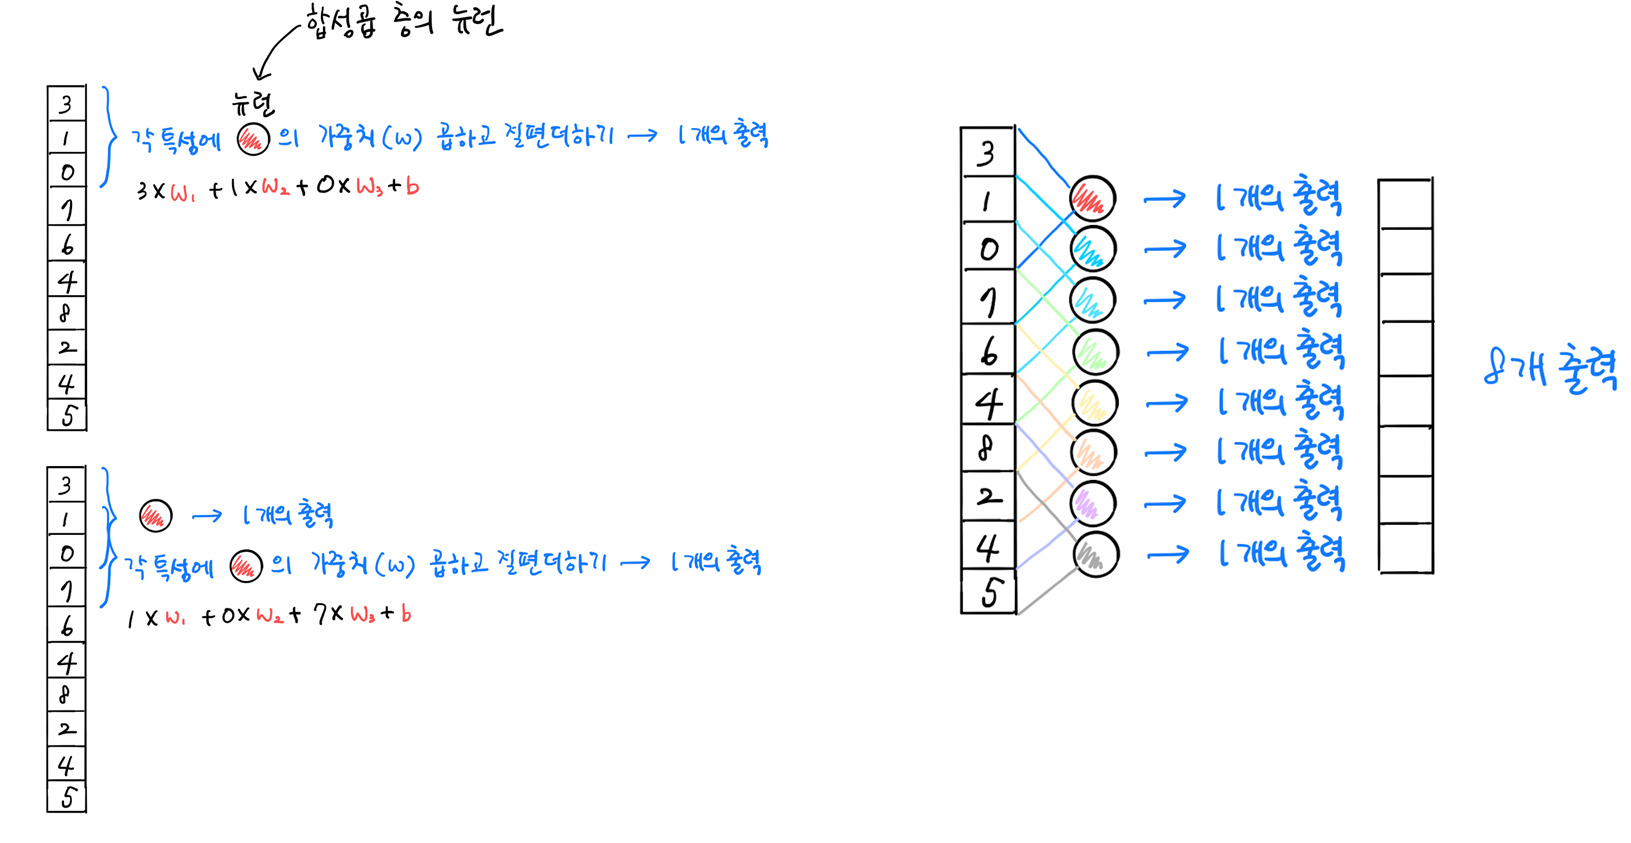

### 합성곱 신경망 convolutional neural network, CNN 
---
- 뉴런을 필터 filter 또는 커널 kernel 이라고 부름
- 필터는 뉴런의 개수
- 커널은 입력에 곱해지는 가중치

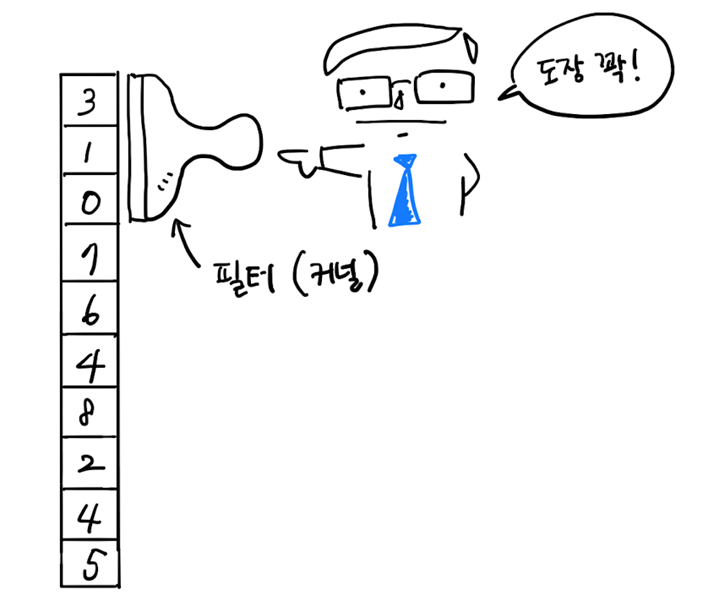

### 2차원 합성곱
---
- 입력이 2차원이면 필터(도장)도 2차원
- 4 x 4 입력에 필터가 3 x 3 이라면 3개의 입력값과 가중치가 곱해진 1개의 출력, 최종 4개의  2 x 2 출력값
- 필터가 오른쪽으로 이동하면서 합성곱 수행
- 이동이 불가 하면 다시 왼쪽 아래로 내려와서 수행

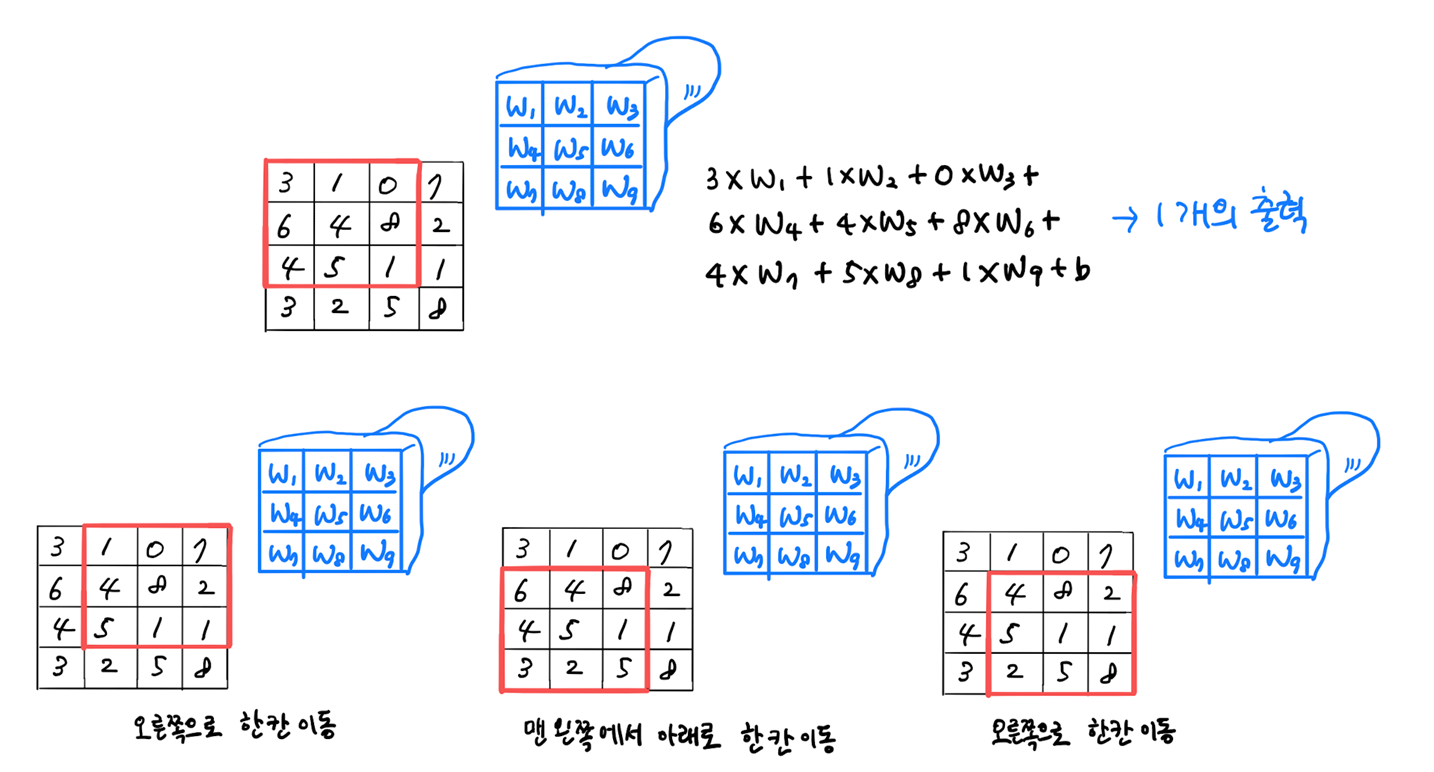

- 4 x 4 의 입력이 2 x 2 로 압축된 느낌
- 이 출력을 특별히 **특성 맵 feature map** 이라고 함

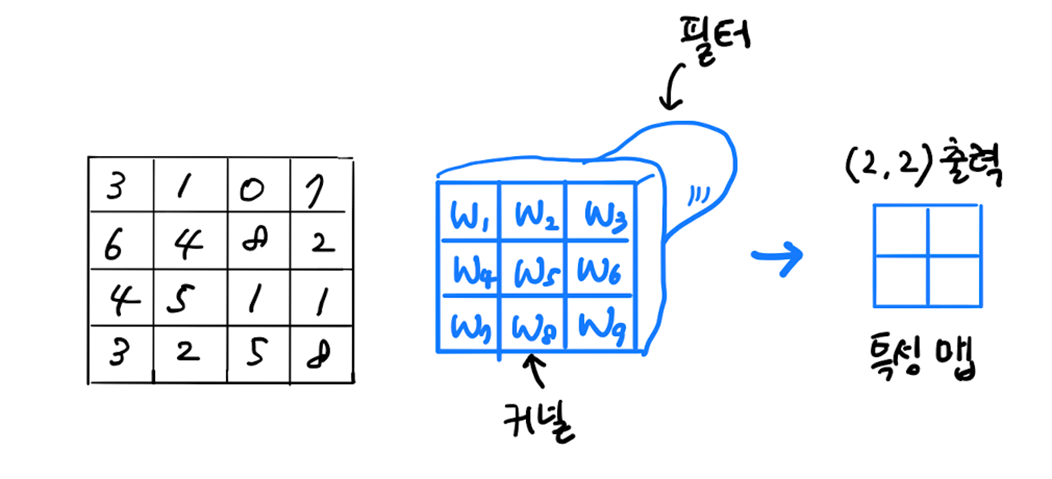

- **여러개의 뉴런을 사용하듯 여러개의 필터 사용**

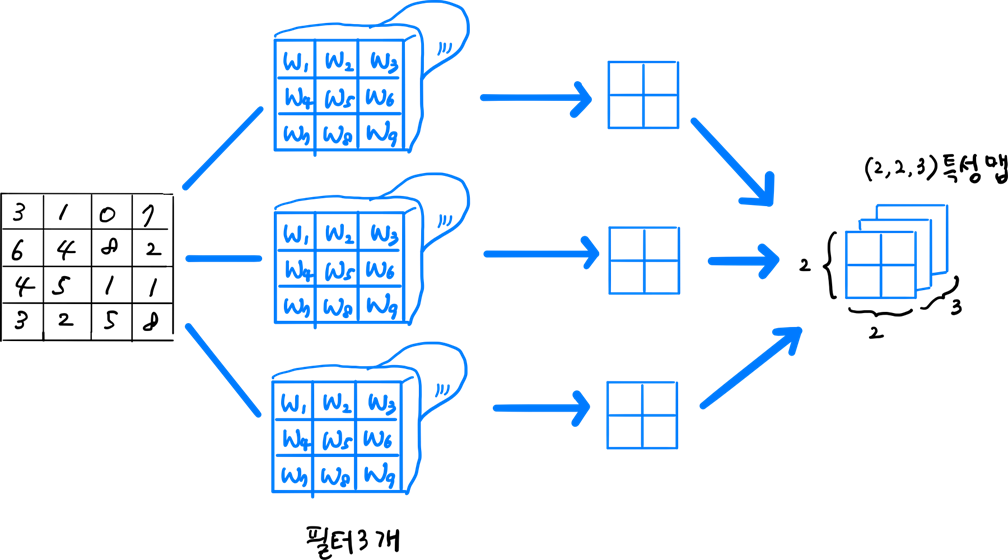

> **합성곱은 2차원 구조를 그대로 사용하기 때문에 이미지 처리 분야에서 띄어난 성능을 발휘**

##  케라스 합성곱 층
---
- keras.layers.Conv2D 클래스 제공
- 하이퍼파리미터 : 필터갯수, 필터 커널의 크기, 활성화함수
- 필터 갯수는 보통 (3,3), (5,5)를 많이 사용
- Dense층 대신에 Conv2D층을 넣어서 사용


In [1]:
from tensorflow import keras

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')


## 패딩과 스트라이드
---
- 입력 (4,4)에 커널 (3,3)을 적용 하면 (2,2)을 출력이 나옴
- 입력 (4,4)에 커널 (3,3)을 적용 해서  (4,4)을 출력이 나오게 하려면 더 큰 입력이 필요 => (6,6) 의 입력을 사용하면 됨

### 패딩 padding
---
- 입력 배열이 주위를 가상의 값 0으로 채우는 것
- 세임 패딩 same padding 입력 크기와 동일하게 특성맵이 나오게 하는 패딩
- 밸리드 패딩 valid padding 패딩없이 특성맵이 나오게 하는 패딩
- 하이퍼파라미터 padding='same'

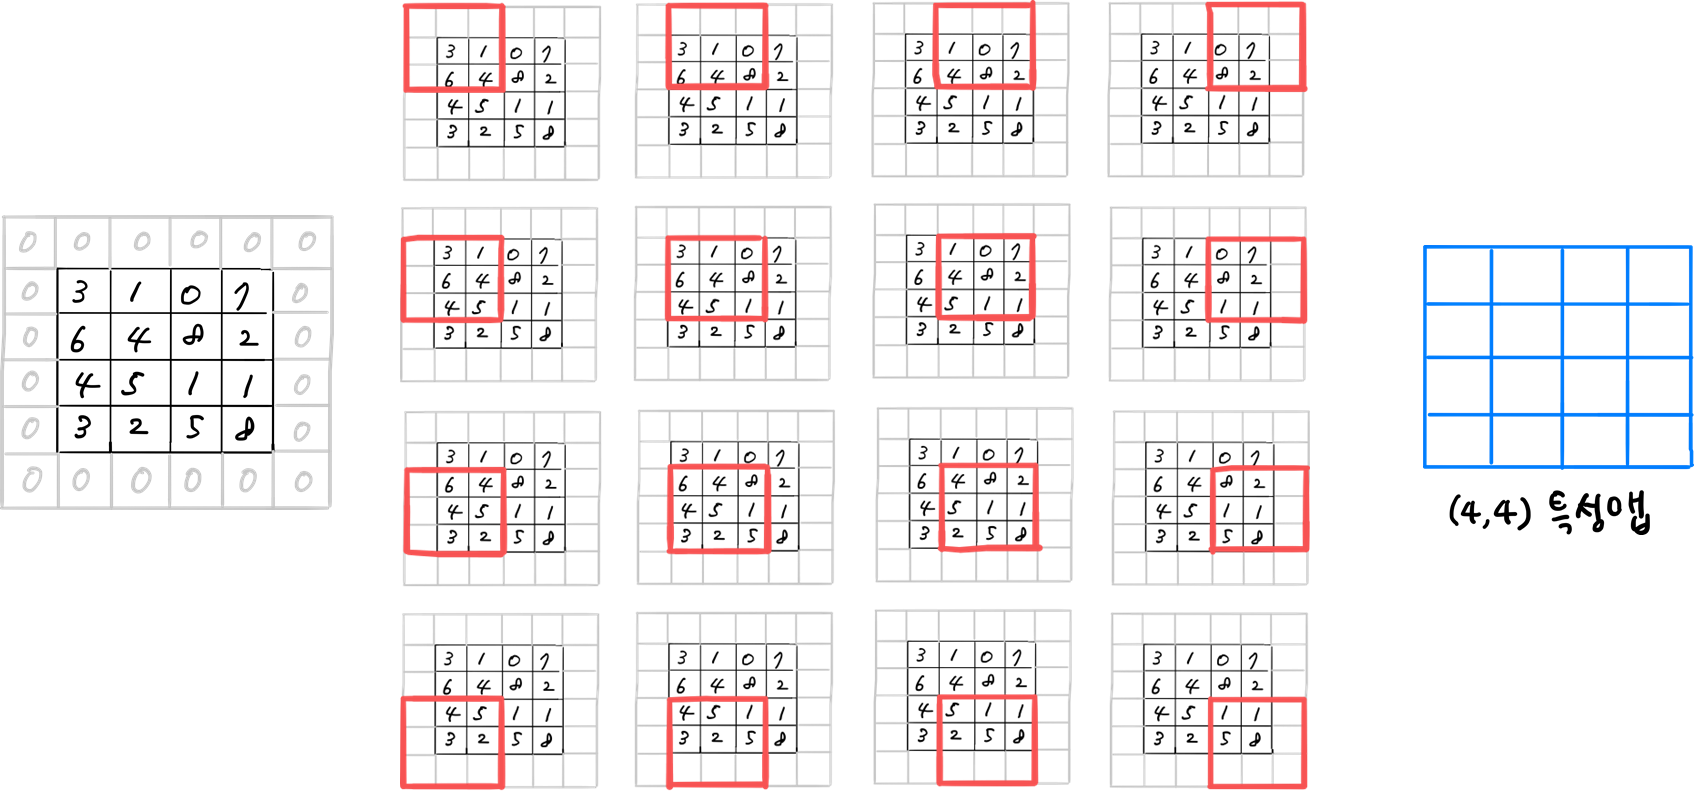

### 세임 패딩 사용 이유
---
- 밸리드 패딩을 사용하면 모서리의 사용은 중앙의 특정 위치의 값이 중복으로 많이 사용됨
- 입력이 이미지라면 모서리의 중요 정보가 전달되지 않고 중앙의 정보만 중요하게 표현됨

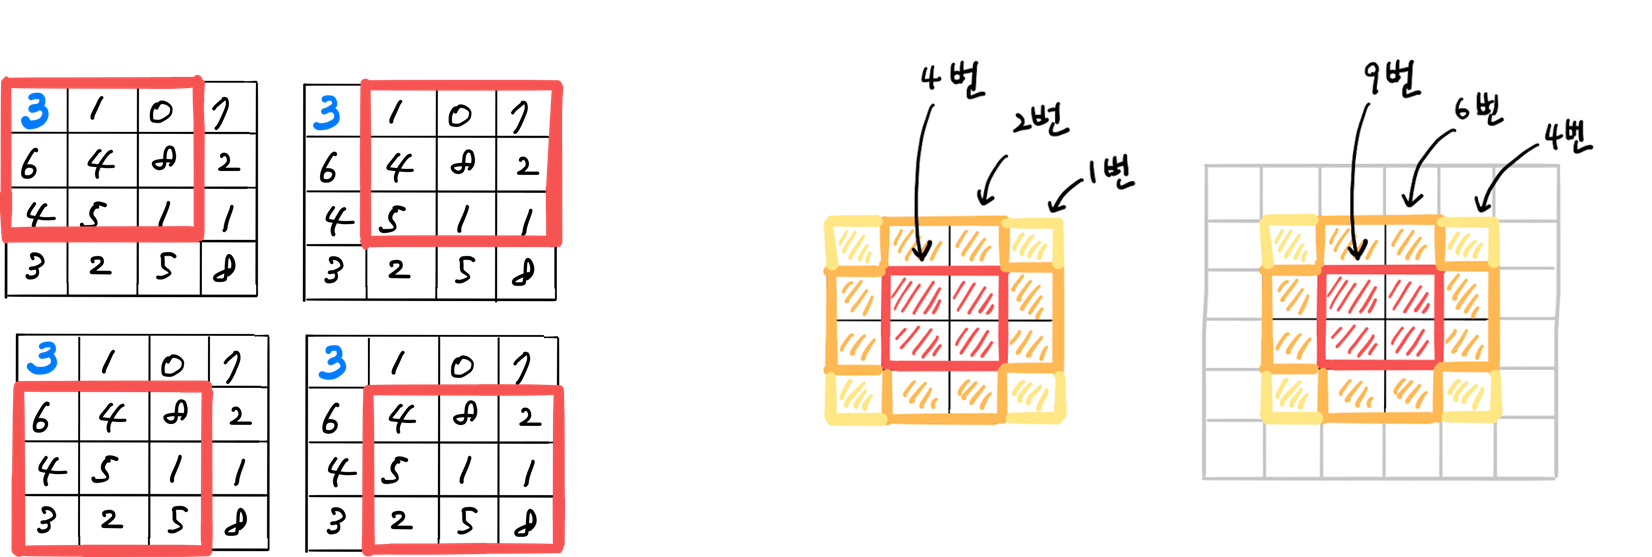

### 스트라이드 stride
---
- 커널의 이동 크기, 
- 하이퍼파라미터 stride 기본값은 (1,1)
- 오른쪽으로 이동하는 크가와 왼쪽 아래로 이동하는 크기를 튜플로 지정 (2,2)
- 하지만 일반적으로 1이상 사용하지는 않음

## 풀링 pooling
---
- 특성 맵의 가로, 세로 크기를 줄이는 역할
- 특성 맵의 갯수는 줄이지 않음
- 가중치 값이 없는 커널로 겹치지 않고 이동하면서 선택
- 최대 플링 max pooling 플링 영역의 큰 값을 선택
- 평균 플링 max pooling 플링 영역의 평균 값을 선택

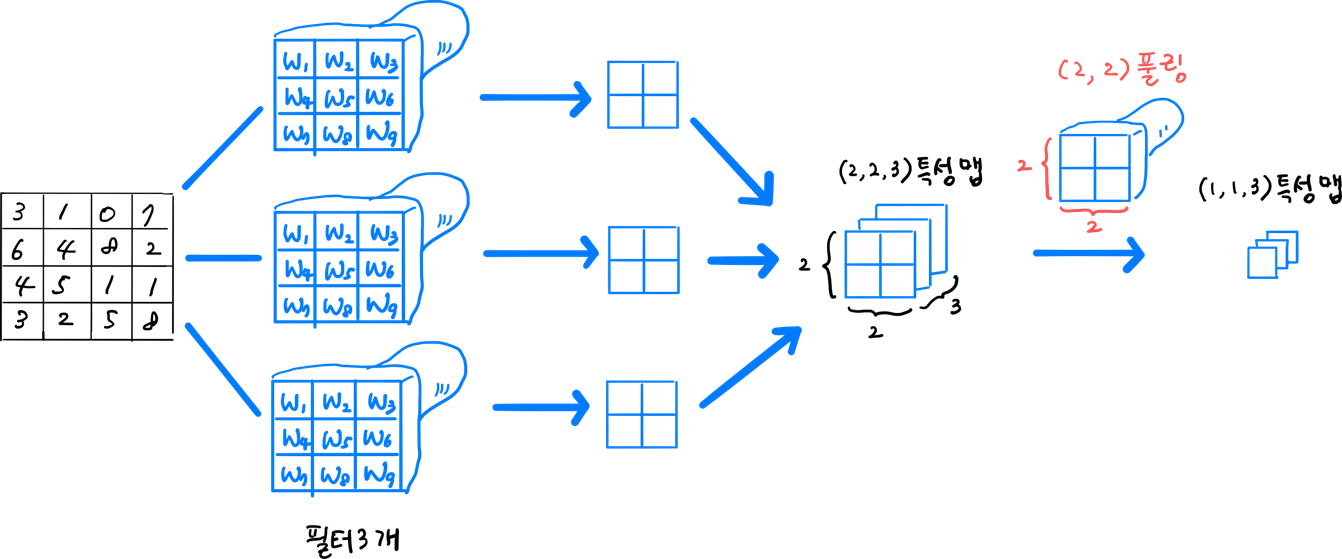

### 최대 플링
---
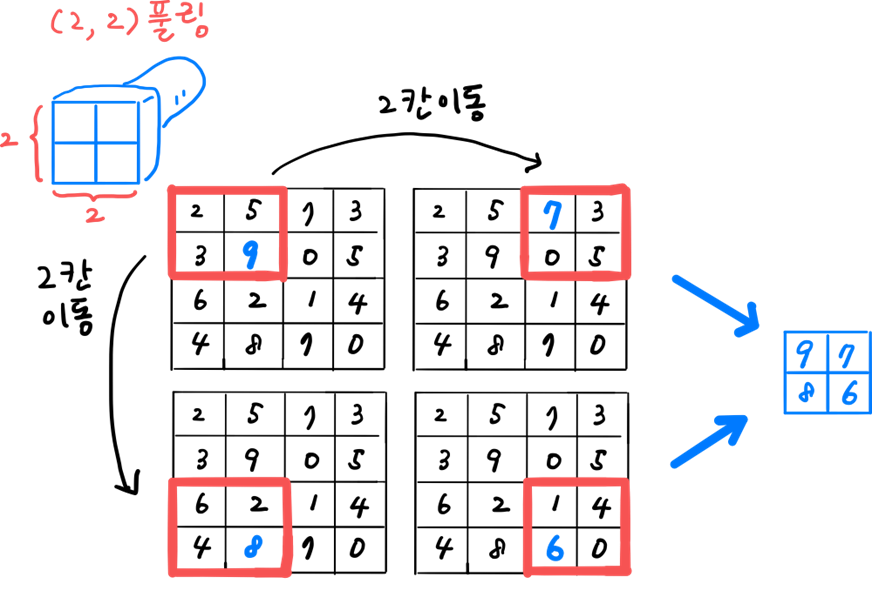 

- **(2,2) 플링은 stride 2로 이동**
- keras.layers.MaxPooling2D(2) 
- 평균 풀링 keras.layers.AveragePooling2D(2) 

> **맥스 플링을 더 많이 사용 함=> 평균 플링은 특성 맵의 중요 정보를 희석시킬 수 있기 때문**

## 합성곱 신경망 흐름
---
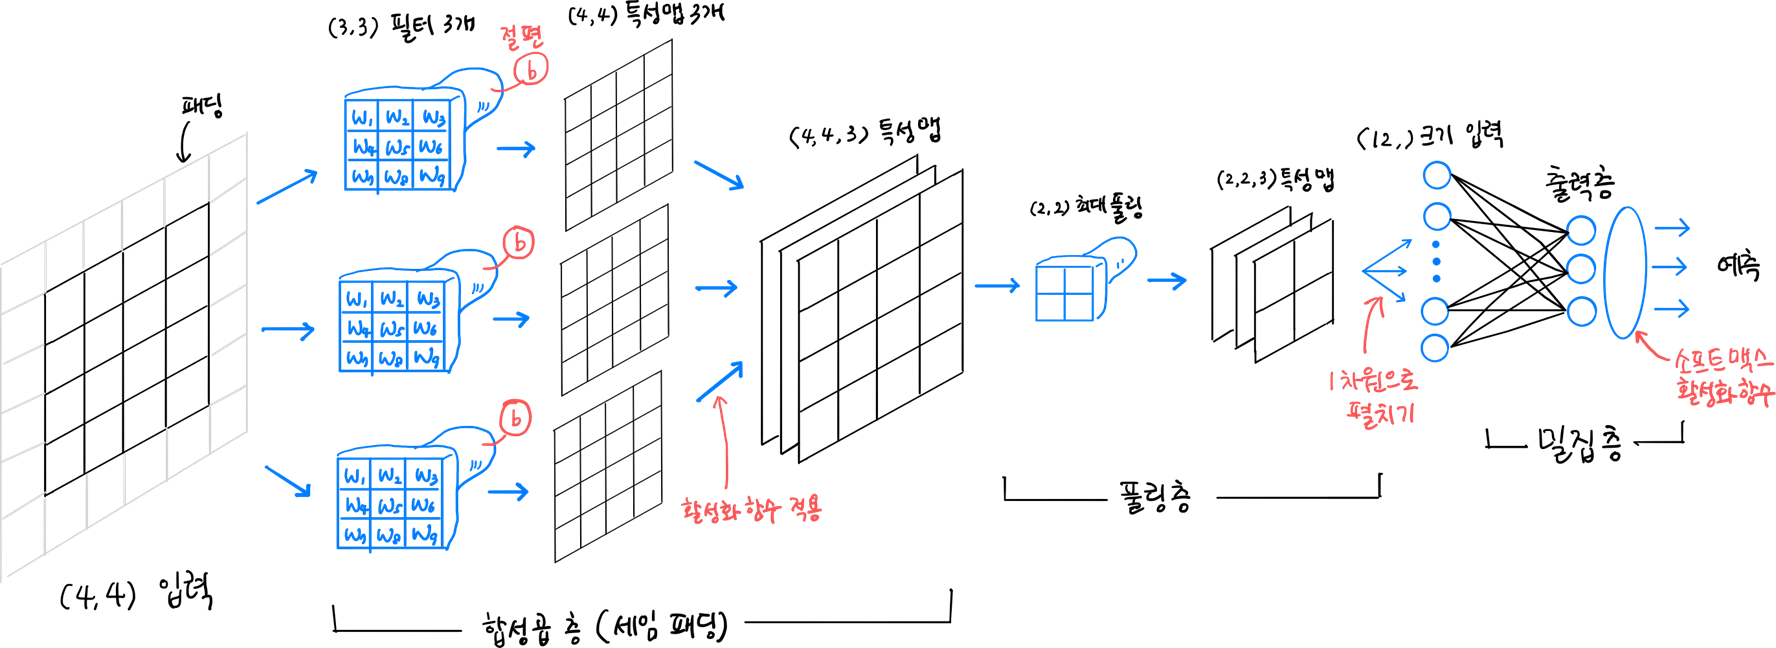